In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201810.gz', '../BL_Work/openPrescribe/serialized/201710.gz', '../BL_Work/openPrescribe/serialized/201203.gz', '../BL_Work/openPrescribe/serialized/201110.gz', '../BL_Work/openPrescribe/serialized/201804.gz', '../BL_Work/openPrescribe/serialized/201308.gz', '../BL_Work/openPrescribe/serialized/201708.gz', '../BL_Work/openPrescribe/serialized/201211.gz', '../BL_Work/openPrescribe/serialized/201707.gz', '../BL_Work/openPrescribe/serialized/201803.gz', '../BL_Work/openPrescribe/serialized/201410.gz', '../BL_Work/openPrescribe/serialized/201301.gz', '../BL_Work/openPrescribe/serialized/201201.gz', '../BL_Work/openPrescribe/serialized/201409.gz', '../BL_Work/openPrescribe/serialized/201812.gz', '../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201109.gz', '../BL_Work/openPrescribe/serialized/201512.gz', '../BL_Work/openPrescribe/serialized/201601.gz', '../BL_Work/openPrescribe/serialized/201101.gz', '../BL_Work/openPre

In [3]:
pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
pdp.dropna()
for month in [ '201602' , '201603']:
    file_path  = '../BL_Work/openPrescribe/serialized/' + month + '.gz'
    pdp2 = pd.read_csv(file_path,compression='gzip')
    pdp2.dropna()
    pdp.append(pdp2)
    

In [4]:
# pdp_BNF = pd.read_csv('../BL_Work/openPrescribe/serialized_BNF/201601.gz',compression='gzip')
# pdp_BNF.dropna()
# for month in [ '201602' , '201603']:
#     file_path  = '../BL_Work/openPrescribe/serialized_BNF/' + month + '.gz'
#     pdp2 = pd.read_csv(file_path,compression='gzip')
#     pdp2.dropna()
#     pdp_BNF.append(pdp2)

In [5]:
pdp.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,1962,Q44,01C,N81002,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,1.0,3.35,3.11,500.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0,BB
1,1963,Q44,01C,N81002,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1.0,2.99,2.77,500.0,...,NaN,NaN,NaN,NaN,220.0,0101010G0,500.0,1.0,500.0,BC
2,1964,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,4.0,30.72,28.42,3000.0,...,NaN,NaN,NaN,NaN,0.0,0101021B0,3000.0,1.0,3000.0,AA
3,1965,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,2.0,9.21,8.53,180.0,...,NaN,NaN,NaN,NaN,500.0,0101021B0,180.0,1.0,180.0,AA
4,1966,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2.0,20.10,18.59,1500.0,...,NaN,NaN,NaN,NaN,0.0,0101021B0,1500.0,1.0,1500.0,BE


In [6]:
# pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201601.gz',compression='gzip')
# pdp.dropna()


In [6]:
set(pdp['12'])

{nan,
 "Meniere's disease",
 'bipolar',
 "crohn's disease",
 'dementia',
 'depression',
 'diabetes',
 'gastroparesis',
 'hypothyroidism',
 'interstitial cystitis',
 'irritable bowel syndrome',
 'parkinson',
 'psoriasis',
 'rheumatoid',
 'sleep apnea'}

In [7]:
%store -r taxonomyDict

In [8]:
%store -r cityMap

In [9]:
disease_drugs = json.load(open("scratchpad/Disease_Drug_DrugBank.json",'rb'))

In [10]:
# pdp.head(n=1000)

In [11]:
ward_pop = pd.read_csv('scratchpad/ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
ward_pop.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [13]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [14]:
GP_META.head()

,BP_code,Name,Grouping,National_geo,Addr1,Addr2,Addr3,Addr4,Addr5,Postcode,...,Contact,Null1,Null2,Null3,Amended,Null4,Provider,Null5,Setting,Null6
0,A81001,THE DENSHAM SURGERY,Y63,Q74,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,NaN,TS18 1HU,...,01642 672351,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
1,A81002,QUEENS PARK MEDICAL CENTRE,Y63,Q74,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,NaN,TS18 2AW,...,01642 679681,NaN,NaN,NaN,1,NaN,00K,NaN,4,NaN
2,A81003,VICTORIA MEDICAL PRACTICE,Y54,Q74,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,NaN,TS26 8DB,...,01429 272945,NaN,NaN,NaN,0,NaN,00K,NaN,4,NaN
3,A81004,BLUEBELL MEDICAL CENTRE,Y63,Q74,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,NaN,NaN,TS5 8SB,...,01642 827697,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN
4,A81005,SPRINGWOOD SURGERY,Y63,Q74,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,NaN,TS14 7DJ,...,01287 619611,NaN,NaN,NaN,1,NaN,00M,NaN,4,NaN


In [15]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [16]:
len(Open_filtered_GPs)

6924

In [17]:
df_city = pd.read_csv('../BL_Work/lower_layer_super_output_area_2011_to_major_towns_and_cities_december_2015_lookup_in_england_and_wales.csv')

In [18]:
cityMap = {}
for name , group in df_city.groupby('TCITY15NM'):
        cityMap[name] = list(group['LSOA11CD'])

In [19]:
df_city.head()

,LSOA11CD,LSOA11NM,TCITY15CD,TCITY15NM,FID
0,E01002351,Havering 016C,J01000055,London,2001
1,E01002352,Havering 016D,J01000055,London,2002
2,E01002100,Haringey 008B,J01000055,London,2003
3,E01002301,Havering 003A,J01000055,London,2004
4,E01002353,Havering 013B,J01000055,London,2005


In [20]:
IMD_df = pd.read_csv('../BL_Work/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv')

In [21]:
IMD_df.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031349,Adur 001A,E07000223,Adur,12.389,21352,7,0.096,18992,6,...,20379,7,0.312,11318,4,1318,206,694,418,702.75
1,E01031350,Adur 001B,E07000223,Adur,28.619,8864,3,0.187,9233,3,...,16285,5,0.234,12445,4,1212,232,712,268,720.75
2,E01031351,Adur 001C,E07000223,Adur,11.713,22143,7,0.065,24539,8,...,25054,8,0.208,12820,4,1577,290,829,458,838.25
3,E01031352,Adur 001D,E07000223,Adur,16.446,17252,6,0.117,16087,5,...,24455,8,0.109,14350,5,1453,233,739,481,748.25
4,E01031370,Adur 001E,E07000223,Adur,18.265,15643,5,0.102,17918,6,...,20214,7,0.321,11202,4,1443,306,799,338,795.50


In [23]:
LSOA_survey_takers = json.load(open('scratchpad/LSOA_suvery_pop.json'))

In [24]:
LSOA_pop = {}
LSOA_IMD = {}
for index, row in IMD_df.iterrows():
    LSOA_pop[row['LSOA code (2011)']] = row['Total population: mid 2012 (excluding prisoners)']
    LSOA_IMD[row['LSOA code (2011)']] = row['Index of Multiple Deprivation (IMD) Score']

In [25]:
cityPop = {}
city_IMD = {}
city_survey_pop = {}
for k in cityMap:
    pop = 0
    surveypop = 0
    IMD = []
    for j in cityMap[k]:
        try:
            pop += LSOA_pop[j]
            surveypop += LSOA_survey_takers[j]
            IMD.append(LSOA_IMD[j])
        except:
            print("could not find LSOA",j)
    city_IMD[k] = {}
    if pop > 0:
        cityPop[k] = pop
        city_survey_pop[k] = surveypop
        city_IMD[k]['median_IMD'] = np.median(IMD)
        city_IMD[k]['mean_IMD'] = np.mean(IMD)

('could not find LSOA', 'W01001912')
('could not find LSOA', 'W01001913')
('could not find LSOA', 'W01001600')
('could not find LSOA', 'W01001651')
('could not find LSOA', 'W01001601')
('could not find LSOA', 'W01001652')
('could not find LSOA', 'W01001602')
('could not find LSOA', 'W01001653')
('could not find LSOA', 'W01001654')
('could not find LSOA', 'W01001603')
('could not find LSOA', 'W01001604')
('could not find LSOA', 'W01001655')
('could not find LSOA', 'W01001605')
('could not find LSOA', 'W01001606')
('could not find LSOA', 'W01001607')
('could not find LSOA', 'W01001659')
('could not find LSOA', 'W01001608')
('could not find LSOA', 'W01001660')
('could not find LSOA', 'W01001609')
('could not find LSOA', 'W01001661')
('could not find LSOA', 'W01001610')
('could not find LSOA', 'W01001662')
('could not find LSOA', 'W01001611')
('could not find LSOA', 'W01001663')
('could not find LSOA', 'W01001612')
('could not find LSOA', 'W01001664')
('could not find LSOA', 'W01001613')
(

In [ ]:
# json.dump(city_survey_pop,open('city_SurveyPop.json','wb'))
# json.dump(LSOA_pop,open('LSOA_Pop.json','wb'))

In [ ]:
# json.dump(city_IMD,open('city_IMD.json','wb'))

In [ ]:
%store Open_filtered_GPs

In [ ]:
pdp = pdp[pdp['2'].isin(Open_filtered_GPs.keys())]

In [ ]:
# pdp_BNF = pdp_BNF[pdp_BNF['2'].isin(Open_filtered_GPs.keys())]

In [ ]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))
    

In [ ]:
ward_pop.head()

In [ ]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [ ]:
sum(population_borough.values())

In [ ]:
# compareKeys = set(ward_pop_prev.keys()).intersection(ward_luca_predict.keys())

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# pearsonr([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev_BNF[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_pop_prev[k] for k in compareKeys])

# sns.regplot([ ward_gt[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

# sns.regplot([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

# pearsonr([ ward_pop_prev[k] for k in compareKeys],[ward_luca_predict[k] for k in compareKeys])

In [ ]:
len(set(ward_pop['Local Authority']))

In [ ]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [ ]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

In [ ]:
# ward_postcode_map

In [ ]:
# ward_gt

In [ ]:
# ward_postcode_map

In [ ]:
%store -r ward_patients_filtered

In [ ]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [ ]:
sum(ward_patients_filtered.values())

In [ ]:
disease = list(set(pdp[pd.notnull(pdp['12'])]['12']))
print disease

In [ ]:
All_drug_count = {}
for name, group in tqdm(pdp.groupby('2')):
    all_drugs = np.sum(group['19'])
    if name in LSOA_dist:
        for k in LSOA_dist[name]:
            if k not in All_drug_count:
                All_drug_count[k] = 0.0
            All_drug_count[k]+= float(all_drugs)*float(LSOA_dist[name][k])

In [ ]:
# All_drug_count.keys()

In [ ]:
%store All_drug_count

In [ ]:
LSOA_disease_drug_count = {}
LSOA_disease_dosage_count = {}
for d in tqdm(disease):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_disease_drug_count:
        LSOA_disease_drug_count[d]={}
        LSOA_disease_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['12']==d]
            disease_count = np.sum(disease_presc['5'])
            disease_dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_disease_drug_count[d]:
                    LSOA_disease_drug_count[d][k] = 0.0
                if k not in LSOA_disease_dosage_count[d]:
                    LSOA_disease_dosage_count[d][k] = 0.0
                LSOA_disease_dosage_count[d][k]+= float(disease_dosage_count)*float(LSOA_dist[name][k])
                LSOA_disease_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

In [ ]:
symptom = list(set(pdp[pd.notnull(pdp['13'])]['13']))
print symptom

In [ ]:
LSOA_symptom_drug_count = {}
LSOA_symptom_dosage_count = {}
for d in tqdm(symptom):
# for d in ['dementia','rheumatoid','dementia','depression','diabetes']:
    if d not in LSOA_symptom_drug_count:
        LSOA_symptom_drug_count[d]={}
        LSOA_symptom_dosage_count[d] = {}
    for name, group in pdp.groupby('2'):
        if name in LSOA_dist:
            disease_presc = group[group['13']==d]
            disease_count = np.sum(disease_presc['5'])
            dosage_count = np.sum(disease_presc['19'])
            for k in LSOA_dist[name]:
                if k not in LSOA_symptom_drug_count[d]:
                    LSOA_symptom_drug_count[d][k] = 0.0
                if k not in LSOA_symptom_dosage_count[d]:
                    LSOA_symptom_dosage_count[d][k] = 0.0
                LSOA_symptom_drug_count[d][k]+= float(disease_count)*float(LSOA_dist[name][k])
                LSOA_symptom_dosage_count[d][k]+= float(dosage_count)*float(LSOA_dist[name][k])

In [57]:
# LSOA_disease_drug_count_BNF = {}
# for d in tqdm(disease):
# # for d in ['dementia']:
#     if d not in LSOA_disease_drug_count_BNF:
#         LSOA_disease_drug_count_BNF[d]={}
#     for name, group in tqdm(pdp_BNF.groupby('2')):
#         if name in LSOA_dist:
#             disease_presc = group[group['12']==d]
#             disease_count = np.sum(disease_presc['5'])
#             for k in LSOA_dist[name]:
#                 if k not in LSOA_disease_drug_count_BNF[d]:
#                     LSOA_disease_drug_count_BNF[d][k] = 0.0
#                 LSOA_disease_drug_count_BNF[d][k]+= float(disease_count)*float(LSOA_dist[name][k])

In [59]:
# LSOA_disease_drug_count_BNF

In [161]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [162]:
len(Ward_patients['MH'])

32936

In [163]:
# with open('LSOA_disease_count.json','wb') as f:
#     json.dump(LSOA_disease_drug_count,f)

In [164]:
# %store LSOA_disease_drug_count

In [165]:
# ward_prev_LSOA= {}
# for k in LSOA_disease_drug_count['diabetes']:
#     if LSOA_disease_drug_count['diabetes'][k] > Ward_patients[k]:
#         print LSOA_disease_drug_count['diabetes'][k] , Ward_patients[k]
# #         continue
#     ward_prev_LSOA[k] = LSOA_disease_drug_count['diabetes'][k]/Ward_patients[k]

In [166]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [167]:
df.head()

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5


In [168]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [169]:
city_prevalence_UK = {}
city_gt_prevalence_UK = {}

for k in cityMap:
    try:
        city_disease_presc = np.sum([LSOA_disease_dosage_count['dementia'][w] for w in cityMap[k] if not np.isnan(LSOA_disease_dosage_count['dementia'][w])])
#         city_patient_pop = np.sum([Ward_patients['DEM'][w] for w in cityMap[k] if not np.isnan(Ward_patients['DEM'][w])])
        city_disease_pop = np.sum([DiseasePop_byWard['DEM'][w] for w in cityMap[k] if not np.isnan(DiseasePop_byWard['DEM'][w])])
        city_prevalence_UK[k] = float(city_disease_presc)/float(cityPop[k])
        city_gt_prevalence_UK[k] = float(city_disease_pop)/float(cityPop[k])
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [170]:
len(city_prevalence_UK)

109

In [171]:
city_prevalence_UK

{'Barnsley': 1.148492259270779,
 'Basildon': 0.9244808633240316,
 'Basingstoke': 0.8645041883303904,
 'Bath': 0.7600593553616624,
 'Bedford': 0.9236266646798719,
 'Birkenhead': 1.43770074066997,
 'Birmingham': 0.7819087502560997,
 'Blackburn': 1.0939916015846398,
 'Blackpool': 1.6087725969583746,
 'Bolton': 1.0956907716461801,
 'Bournemouth': 1.3736361450492662,
 'Bracknell': 0.73720133815275,
 'Bradford': 0.956802137573008,
 'Brighton and Hove': 0.9570907807239637,
 'Bristol': 0.8867809497540915,
 'Burnley': 1.0975268681361248,
 'Burton upon Trent': 0.8730263593063375,
 'Bury': 1.191997247704603,
 'Cambridge': 1.0478204947940006,
 'Carlisle': 1.376383381906577,
 'Chatham': 0.6786778824426368,
 'Chelmsford': 0.89553613117234,
 'Cheltenham': 1.8805240290385299,
 'Chester': 1.0782642180020077,
 'Chesterfield': 1.4797786045830346,
 'Colchester': 0.75160831428514,
 'Coventry': 0.8304233973584182,
 'Crawley': 0.9624758710479383,
 'Darlington': 1.3092954776888017,
 'Derby': 1.549976162632970

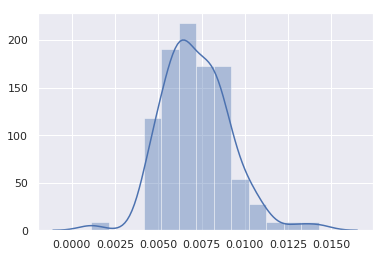

In [172]:
sns.distplot(city_gt_prevalence_UK.values())

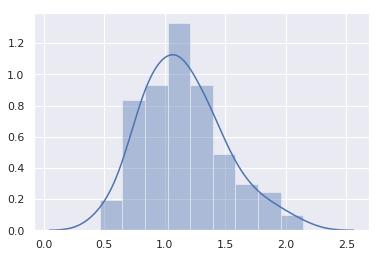

In [173]:
sns.distplot(city_prevalence_UK.values())

In [174]:
commonWards_UK_borough = set(city_prevalence_UK.keys()).intersection(city_gt_prevalence_UK.keys())

Text(0,0.5,'BNF prevalence')

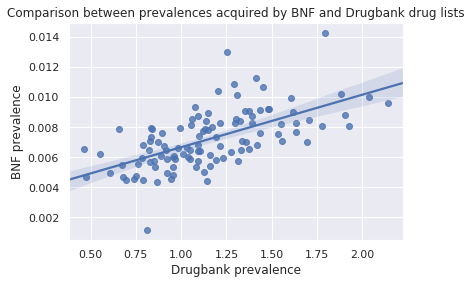

In [175]:
sns.regplot([ city_prevalence_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])
ax = plt.gca()
ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
ax.set_xlabel("Drugbank prevalence")
ax.set_ylabel("BNF prevalence")

In [176]:
pearsonr([ city_prevalence_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.6144469853146018, 1.1917344241114468e-12)

In [177]:
LSOA_disease_drug_count.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'rheumatoid',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'gastroparesis',
 'depression',
 'diabetes']

In [178]:
city_prevalence_UK = {}
city_disease_prescription_count = {}
city_all_prescription_count = {}
for d in LSOA_disease_drug_count:
    if d not in city_prevalence_UK:
        city_prevalence_UK[d] = {}
        city_disease_prescription_count[d] = {}

        for k in cityMap:
            try:
                city_disease_presc = np.sum([LSOA_disease_drug_count[d][w] for w in cityMap[k] if not np.isnan(LSOA_disease_drug_count[d][w])])
                if k not in city_all_prescription_count:
                    city_all_presc = np.sum([All_drug_count[w] for w in cityMap[k] if not np.isnan(All_drug_count[w])])
                    city_all_prescription_count[k] = city_all_presc
                city_disease_prescription_count[d][k] = city_disease_presc
                city_prevalence_UK[d][k] = float(city_disease_presc)/float(cityPop[k])
            except:
                print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [179]:
city_prevalence_UK.keys()

['psoriasis',
 "Meniere's disease",
 "crohn's disease",
 'gastroparesis',
 'irritable bowel syndrome',
 'parkinson',
 'sleep apnea',
 'interstitial cystitis',
 'bipolar',
 'hypothyroidism',
 'dementia',
 'rheumatoid',
 'depression',
 'diabetes']

In [180]:
sum(city_all_prescription_count.values())

7780565462.782055

In [79]:
# borough_disease_prescription_count['diabetes']

In [181]:
# borough_prevalence_UK['rheumatoid']

In [182]:
FinalDisease_prevalence = {'2016Q1':city_prevalence_UK}
with open('Disease_Prevalence_City.json','wb') as f:
    json.dump(FinalDisease_prevalence,f)

In [183]:
city_prevalence_UK

{"Meniere's disease": {'Barnsley': 0.005823871822539486,
  'Basildon': 0.0028201656582697576,
  'Basingstoke': 0.001487527975025461,
  'Bath': 0.0007832627833162701,
  'Bedford': 0.0013271170525029877,
  'Birkenhead': 0.0033094600943976075,
  'Birmingham': 0.002389716570399248,
  'Blackburn': 0.0027164284859945626,
  'Blackpool': 0.003957933299368927,
  'Bolton': 0.0036424040094668628,
  'Bournemouth': 0.001818471170171097,
  'Bracknell': 0.0012691698746131247,
  'Bradford': 0.0020894000186548276,
  'Brighton and Hove': 0.0015223459162123552,
  'Bristol': 0.0012299088025097217,
  'Burnley': 0.0024730564227927036,
  'Burton upon Trent': 0.002615269295709109,
  'Bury': 0.0023165532464344326,
  'Cambridge': 0.0008868274077191547,
  'Carlisle': 0.0017439871972939574,
  'Chatham': 0.001956832776649963,
  'Chelmsford': 0.0022849353415467055,
  'Cheltenham': 0.001312336044509614,
  'Chester': 0.002419829877707835,
  'Chesterfield': 0.002711636982938368,
  'Colchester': 0.0013564411315179238,


In [185]:
symptomList= pd.read_csv("../BL_Work/Dis_sym_edited.csv")
symptomList.head()
normId = {}
for index , row in symptomList.iterrows():
    normId[row['norm_UID'].strip().lower()] = row['UID']

In [189]:
city_prevalence_Symptom_UK = {}
city_symptom_prescription_count = {}
for d in LSOA_symptom_drug_count:
    if d not in city_prevalence_Symptom_UK:
        city_symptom_prescription_count[d] = {}
        city_prevalence_Symptom_UK[d] = {}
        city_prevalence_Symptom_UK[d]['Id'] = normId[d]
        city_prevalence_Symptom_UK[d]['prev']={}

        for k in cityMap:
            try:
                city_disease_presc = np.sum([LSOA_symptom_dosage_count[d][w] for w in cityMap[k] if not np.isnan(LSOA_symptom_drug_count[d][w])])
                city_symptom_prescription_count[d][k] = city_disease_presc
                city_prevalence_Symptom_UK[d]['prev'][k] = float(city_disease_presc)/float(cityPop[k])
            except:
                print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [197]:
len(city_prevalence_Symptom_UK['anxiety']['prev'])

109

In [192]:
# FinalSymptom_prevalence = {'2016Q1':city_prevalence_Symptom_UK}
# with open('Symptom_Prevalence_city.json','wb') as f:
#     json.dump(FinalSymptom_prevalence,f)

In [198]:
# confidence_disease = json.load(open('../processed/DiseaseConfidence_V2_352.json','rb'))
# confidence_symptom = json.load(open('../processed/SymtomConfidence_with_normID_349.json','rb'))

In [199]:

# DiseasePrevalence = FinalDisease_prevalence['2016Q1']
# SymptomPrevalence = FinalSymptom_prevalence['2016Q1']

In [201]:
DiseasePop_byWard.keys()

['CKD',
 'LD',
 'DM',
 'CHD',
 'COPD',
 'AST',
 'DEP',
 'AF',
 'MH',
 'OB',
 'HYP',
 'PC',
 'OST',
 'PAD',
 'RA',
 'CVDPP',
 'CAN',
 'STIA',
 'HF',
 'EP',
 'DEM']

In [503]:
city_prevalence_UK = {}
city_prevalence_dosage_UK = {}
city_gt_prevalence_UK = {}
city_prescription_count = {}
disease_key = 'depression'
survey_key = 'DEP'
for k in tqdm(cityMap):
    try:
        city_disease_presc = np.sum([LSOA_disease_drug_count[disease_key][w] for w in cityMap[k] if not np.isnan(LSOA_disease_drug_count[disease_key][w])])
        city_disease_dosage_presc = np.sum([LSOA_disease_dosage_count[disease_key][w] for w in cityMap[k] if not np.isnan(LSOA_disease_dosage_count[disease_key][w])])
        city_patient_pop = np.sum([Ward_patients[survey_key][w] for w in cityMap[k] if not np.isnan(Ward_patients[survey_key][w])])
        city_disease_pop = np.sum([DiseasePop_byWard[survey_key][w] for w in cityMap[k] if not np.isnan(DiseasePop_byWard[survey_key][w])])
        
        city_prescription_count[k] = city_disease_presc
        city_prevalence_UK[k] = float(city_disease_presc)/float(cityPop[k])
        city_prevalence_dosage_UK[k] = float(city_disease_dosage_presc)/float(cityPop[k])
        city_gt_prevalence_UK[k] = float(city_disease_pop)/float(cityPop[k])
#         city_prevalence_UK[k] = float(city_disease_presc)/city_patient_pop
#         city_prevalence_dosage_UK[k] = float(city_disease_dosage_presc)/city_patient_pop
#         city_gt_prevalence_UK[k] = float(city_disease_pop)/city_patient_pop
    except:
        print("Some ward had wrong data")

100%|██████████| 112/112 [00:00<00:00, 413.44it/s]

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [504]:
# city_prescription_count

In [505]:
# json.dump(city_gt_prevalence_UK,open('dementia_survey_gt.json','wb'))

In [506]:
commonWards_UK_borough = set(city_prevalence_UK.keys()).intersection(city_gt_prevalence_UK.keys())

In [507]:
len(commonWards_UK_borough)

109

In [510]:
city_gt_prevalence_UK

{'Barnsley': 0.09925813378305692,
 'Basildon': 0.11054607775958883,
 'Basingstoke': 0.06600111283953669,
 'Bath': 0.06942634392765816,
 'Bedford': 0.07276541757013799,
 'Birkenhead': 0.14164879369986255,
 'Birmingham': 0.08852945815408246,
 'Blackburn': 0.09518544169595373,
 'Blackpool': 0.14520491808101207,
 'Bolton': 0.09637425055629911,
 'Bournemouth': 0.0861166381773844,
 'Bracknell': 0.11796671847666554,
 'Bradford': 0.09642003520089602,
 'Brighton and Hove': 0.09200147212781006,
 'Bristol': 0.09175156965397802,
 'Burnley': 0.08847362826964247,
 'Burton upon Trent': 0.08929889735013581,
 'Bury': 0.050364591399227075,
 'Cambridge': 0.08033180731379135,
 'Carlisle': 0.11028002197104676,
 'Chatham': 0.07803563000524978,
 'Chelmsford': 0.07405371180093084,
 'Cheltenham': 0.09124313707832613,
 'Chester': 0.10752241570007663,
 'Chesterfield': 0.11047291873068874,
 'Colchester': 0.06942167937073726,
 'Coventry': 0.08774367022731618,
 'Crawley': 0.09549986784249291,
 'Darlington': 0.11230

In [509]:
city_prevalence_UK

{'Barnsley': 0.09681992827419761,
 'Basildon': 0.07494696920223902,
 'Basingstoke': 0.05468708420353803,
 'Bath': 0.05066056381587927,
 'Bedford': 0.03348797820332159,
 'Birkenhead': 0.09568125222873837,
 'Birmingham': 0.04886068026263602,
 'Blackburn': 0.06863514856817794,
 'Blackpool': 0.10767931899540924,
 'Bolton': 0.06654713365219497,
 'Bournemouth': 0.05627709091373719,
 'Bracknell': 0.04626042948854352,
 'Bradford': 0.06461857702155357,
 'Brighton and Hove': 0.05748651244879622,
 'Bristol': 0.05853659100492829,
 'Burnley': 0.06809403441265977,
 'Burton upon Trent': 0.0616161505551591,
 'Bury': 0.05103204417559185,
 'Cambridge': 0.05748208900774292,
 'Carlisle': 0.06015022459190468,
 'Chatham': 0.058174512831629846,
 'Chelmsford': 0.06865940682232259,
 'Cheltenham': 0.07374045360959817,
 'Chester': 0.06318697555590819,
 'Chesterfield': 0.08212722942282263,
 'Colchester': 0.06850490229549659,
 'Coventry': 0.05735444032911497,
 'Crawley': 0.05050305691609985,
 'Darlington': 0.08428

In [468]:
# commonWards_UK_borough = [k for k in commonWards_UK_borough if k != 'Dudley']

In [469]:
# sns.regplot([ DiseasePrevalence['depression'][k]/100 for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [470]:
# pearsonr([ DiseasePrevalence['depression'][k]  for k in commonWards_UK_borough],[London_gt[k] for k in commonWards_UK_borough])

In [471]:
# sns.regplot([ DiseasePrevalence['dementia'][k] for k in commonWards_UK_borough],[borough_gt_prevalence_UK[k] for k in commonWards_UK_borough])
# ax = plt.gca()
# ax.set_title("Comparison between prevalences acquired by BNF and Drugbank drug lists")
# ax.set_xlabel("Drugbank prevalence")
# ax.set_ylabel("BNF prevalence")

In [472]:
pearsonr([ city_prevalence_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.4680854994386916, 2.8604428682774624e-07)

In [473]:
pearsonr([ city_prevalence_dosage_UK[k] for k in commonWards_UK_borough],[city_gt_prevalence_UK[k] for k in commonWards_UK_borough])

(0.6144469853146018, 1.1917344241114468e-12)

In [474]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=12)

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

predict = []
predict_dose = []
gt = []
names = []
logpop = []
logdosage = [] 
for k in commonWards_UK_borough:
    predict.append(city_prevalence_UK[k]*1000.0)
    predict_dose.append(city_prevalence_dosage_UK[k]*10)#*1000.0)
    names.append(k)
    gt.append(city_gt_prevalence_UK[k]*1000.0)
    logpop.append(np.log(cityPop[k]))
    logdosage.append(np.log(city_prescription_count[k]))

# predict

corr1 = pearsonr(predict,gt)
corr2 = pearsonr(predict_dose,gt)
print corr1 , corr2

(0.46808549943869154, 2.8604428682774624e-07) (0.614446985314602, 1.1917344241114238e-12)


In [475]:
disease_string = 'Dementia'

Text(0.1,0.8,'r = 0.46')

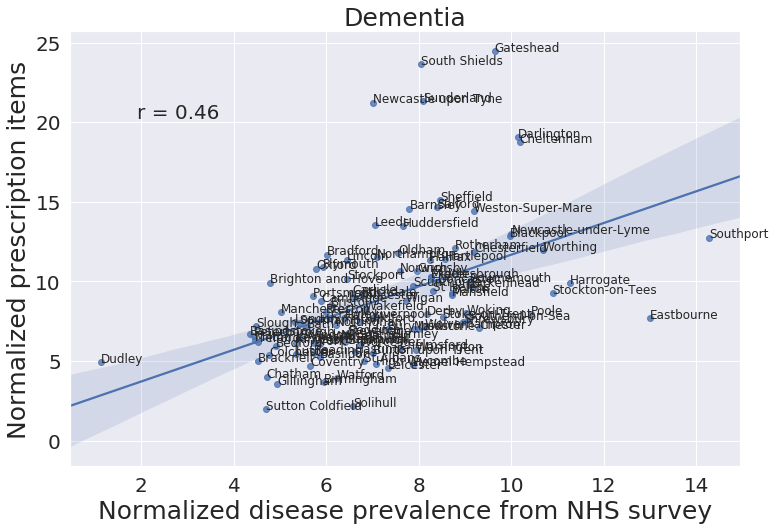

In [476]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt , predict , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription items",fontsize=25)
ax.annotate("r = " +  str(corr1[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)

Text(0.1,0.8,'r = 0.61')

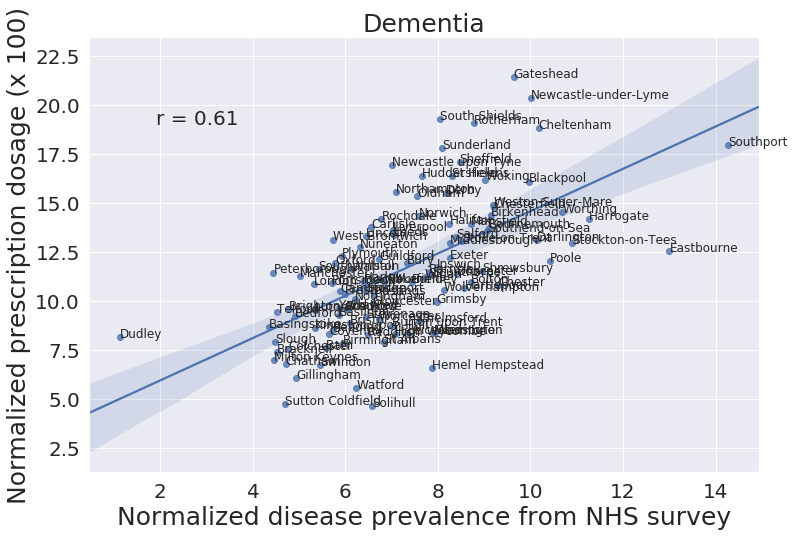

In [477]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x=gt , y = predict_dose)
ax = plt.gca()
# gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 10)
label_point(gt , predict_dose , names , ax)
ax.set_title(disease_string ,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.set_xlabel("Normalized disease prevalence from NHS survey",fontsize=25)
ax.set_ylabel("Normalized prescription dosage (x 100)",fontsize=25)
ax.annotate("r = " +  str(corr2[0])[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)

In [478]:
from scipy.stats import linregress

corr = pearsonr(predict, gt)
print corr

slope, intercept, r_value, p_value, std_err = linregress(x=predict,y=gt)

print slope,  intercept , r_value , p_value , std_err

(0.46808549943869154, 2.8604428682774624e-07)
0.22005532587347262 5.250528138658121 0.4680854994386918 2.860442868277419e-07 0.040161636128594885


In [479]:
from scipy.stats import linregress

corr = pearsonr(logpop, logdosage)
print corr

slope, intercept, r_value, p_value, std_err = linregress(x=logpop,y=logdosage)

print slope,  intercept , r_value , p_value , std_err

(0.8389157299349423, 4.9232752067478644e-30)
0.9921299139684787 -4.723121227497177 0.8389157299349423 4.923275206747867e-30 0.06222512797802202


In [480]:
r_value**2

0.7037796019322771

Text(0.1,0.7,'$R^2$: 0.70')

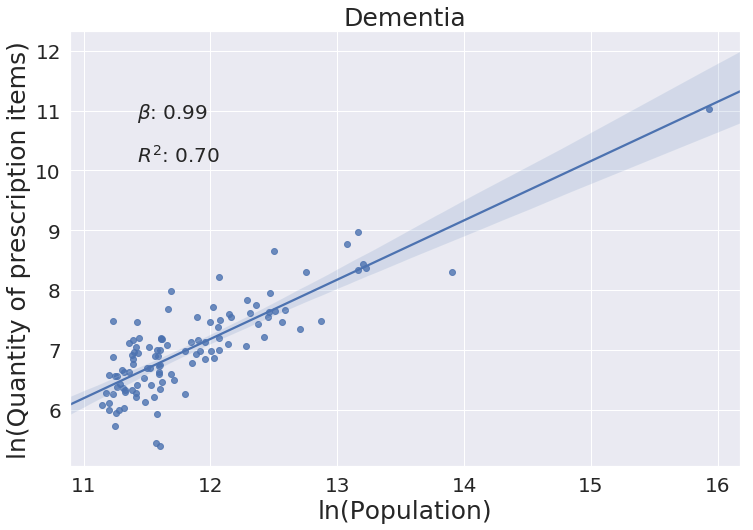

In [481]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=logpop,y=logdosage,ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("ln(Quantity of prescription items)",fontsize=25)
ax.set_title(disease_string,fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
# label_point(logpop , logdosage , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)